# Exploration of data

In [5]:
%matplotlib inline

from waveletAnalysis import waveletAnalysis as wave
import timecourseAnalysis as tca
from hdf5manager import hdf5manager as h5
from matplotlib import pyplot as plt
from wholeBrainPCA import *
import scipy
import math
from scipy import ndimage
from skimage.measure import label, regionprops
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.externals import joblib
import os

# plt.rc("font", size=14)
# sns.set(style="white")
# sns.set(style="whitegrid", color_codes=True)

# import plotly
# plotly.tools.set_credentials_file(username='brmullen', api_key='w9zNJSqbIzgDUYE9ET7R')

Error importing slackNotify.py
	 ERROR :  No module named 'slacker'


In [6]:
#Open file
path = '/Users/shreyamantripragada/Documents/'
file = 'test_angs_mags_metrics.csv'
tsv_output_file = path + file
data = pd.DataFrame.from_csv(tsv_output_file)

print(data.head())

   mov.mean  mov.std  mov.mode  mov.range  mov.eventrest  mov.maxeventval  \
0       0.0      0.0      3675        0.0              0              0.0   
1       0.0      0.0      3675        0.0              0              0.0   
2       0.0      0.0      3675        0.0              0              0.0   
3       0.0      0.0      3675        0.0              0              0.0   
4       0.0      0.0      3675        0.0              0              0.0   

   mov.surfarea  mov.totalmag  mov.firstder  mov.secder  ...  mov.timetoevent  \
0             0           0.0           0.0         0.0  ...              114   
1             0           0.0           0.0         0.0  ...              113   
2             0           0.0           0.0         0.0  ...              112   
3             0           0.0           0.0         0.0  ...              111   
4             0           0.0           0.0         0.0  ...              110   

   move.timefromevent  brain.data  brain.eventrest

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """


In [7]:
%matplotlib inline

col_list = list(data)

#puts the paramter on a scale of 0 to 1

data -= data.min()
data /= data.max()
data['move_mean'] = data['move_mean']
data = data.fillna(value=0)


#print(data.head())

KeyError: 'move_mean'

In [11]:
#notnoise_index = data.loc[data['standard_deviation'] < 1].index

# def sepHist(data, artifact, noise):
    
#     noisedf = data[classify == 2]
#     artifactdf = data[classify == 1]
#     sigdf = data[classify == 0]
#     return noisedf, artifactdf, sigdf

# noisedf, artifactdf, sigdf = sepHist(data, artifact, noise)
col_list = data.columns.tolist()
print(col_list)

#print(data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 1.0)].index)
data = data.astype('float16')
data['classification'] = np.zeros(len(data))
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 1.0)].index] = 2
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 0.0)].index] = 3
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 1.0)].index] = 0
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 0.0)].index] = 1


# for col in col_list:
#     print(col)

#     fig , ax1 = plt.subplots()
#     ax1.hist(data.loc[body_rest_brain_active, col], bins = 25, alpha = 0.5, label ='mo', color = 'g')
#     ax1.grid(False)         
#     ax1.set_xlabel('Values')
#     ax1.set_ylabel('# of instances', color = 'green')

#     ax2 = ax1.twinx()
#     ax2.hist(data.loc[body_rest_brain_rest, col], bins = 25, alpha = 0.5, label ='body_rest_brain_rest', color = 'b')
#     ax2.set_ylabel('# of instances', color = 'blue')
#     ax2.grid(False)
    
#     ax3 = ax1.twinx()
#     ax3.hist(data.loc[body_active_brain_active], bins = 25, alpha = 0.5, label = 'body_active_brain_active', color = 'o')
#     ax3.set_ylabel('# of instances', color = 'orange')
#     ax3.grid(False)
    
#     ax4 = ax1.twinx()
#     ax4.hist(data.loc[body_active_brain_rest], bins = 25, alpha = 0.5, label = 'body_active_brain_rest', color = 'k')
#     ax4.set_ylable('# of instances', color = 'black')
#     ax4.grid(False)
    
# #     ax2.hist(noisedf[col].dropna(), bins = 25, alpha = 0.5, label ='noise', color = 'r')
# #     ax2.set_xlabel('Values')
# #     ax2.set_ylabel('# of instances', color = 'red')
    
#     ax1.legend(loc='upper left')
#     ax2.legend(loc='upper right')
    
#     plt.show()

    
    
#     fig = plt.figure()
#     x = data.loc[(data[col]) & (noise[:X_reduced_tsne.shape[0]] == 0)]
#     y = data.iloc[[noise[:X_reduced_tsne.shape[0]] == 1],col]
#     ax = fig.add_subplot(111)
#     _ = ax.hist(x)
#     _ = ax.hist(y, color ='red', alpha=0.3)
    
# #     data[col,np.where(noise[:X_reduced_tsne.shape[0]] == 0)]
# #     d
#     plt.show()

# for col in col_list:
#     print(col)
#     data3[col].apply(np.log2).hist(by = noise[:X_reduced_tsne.shape[0]])
#     plt.show()


['mov.mean', 'mov.std', 'mov.mode', 'mov.range', 'mov.eventrest', 'mov.maxeventval', 'mov.surfarea', 'mov.totalmag', 'mov.firstder', 'mov.secder', 'mov.stdx', 'mov.stdy', 'mov.diffxystd', 'mov.diffmaxevents', 'mov.percent', 'mov.percenterror', 'mov.timetoevent', 'move.timefromevent', 'brain.data', 'brain.eventrest', 'brain.range_maxmin', 'brain.firstder', 'brain.secder', 'diff.brainmov', 'diff.brainmovefirstder', 'diff.brainmovesecder', 'classification']
Int64Index([ 129,  130,  132,  133,  134,  135,  141,  142,  143,  144,
            ...
            3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999],
           dtype='int64', length=1505)


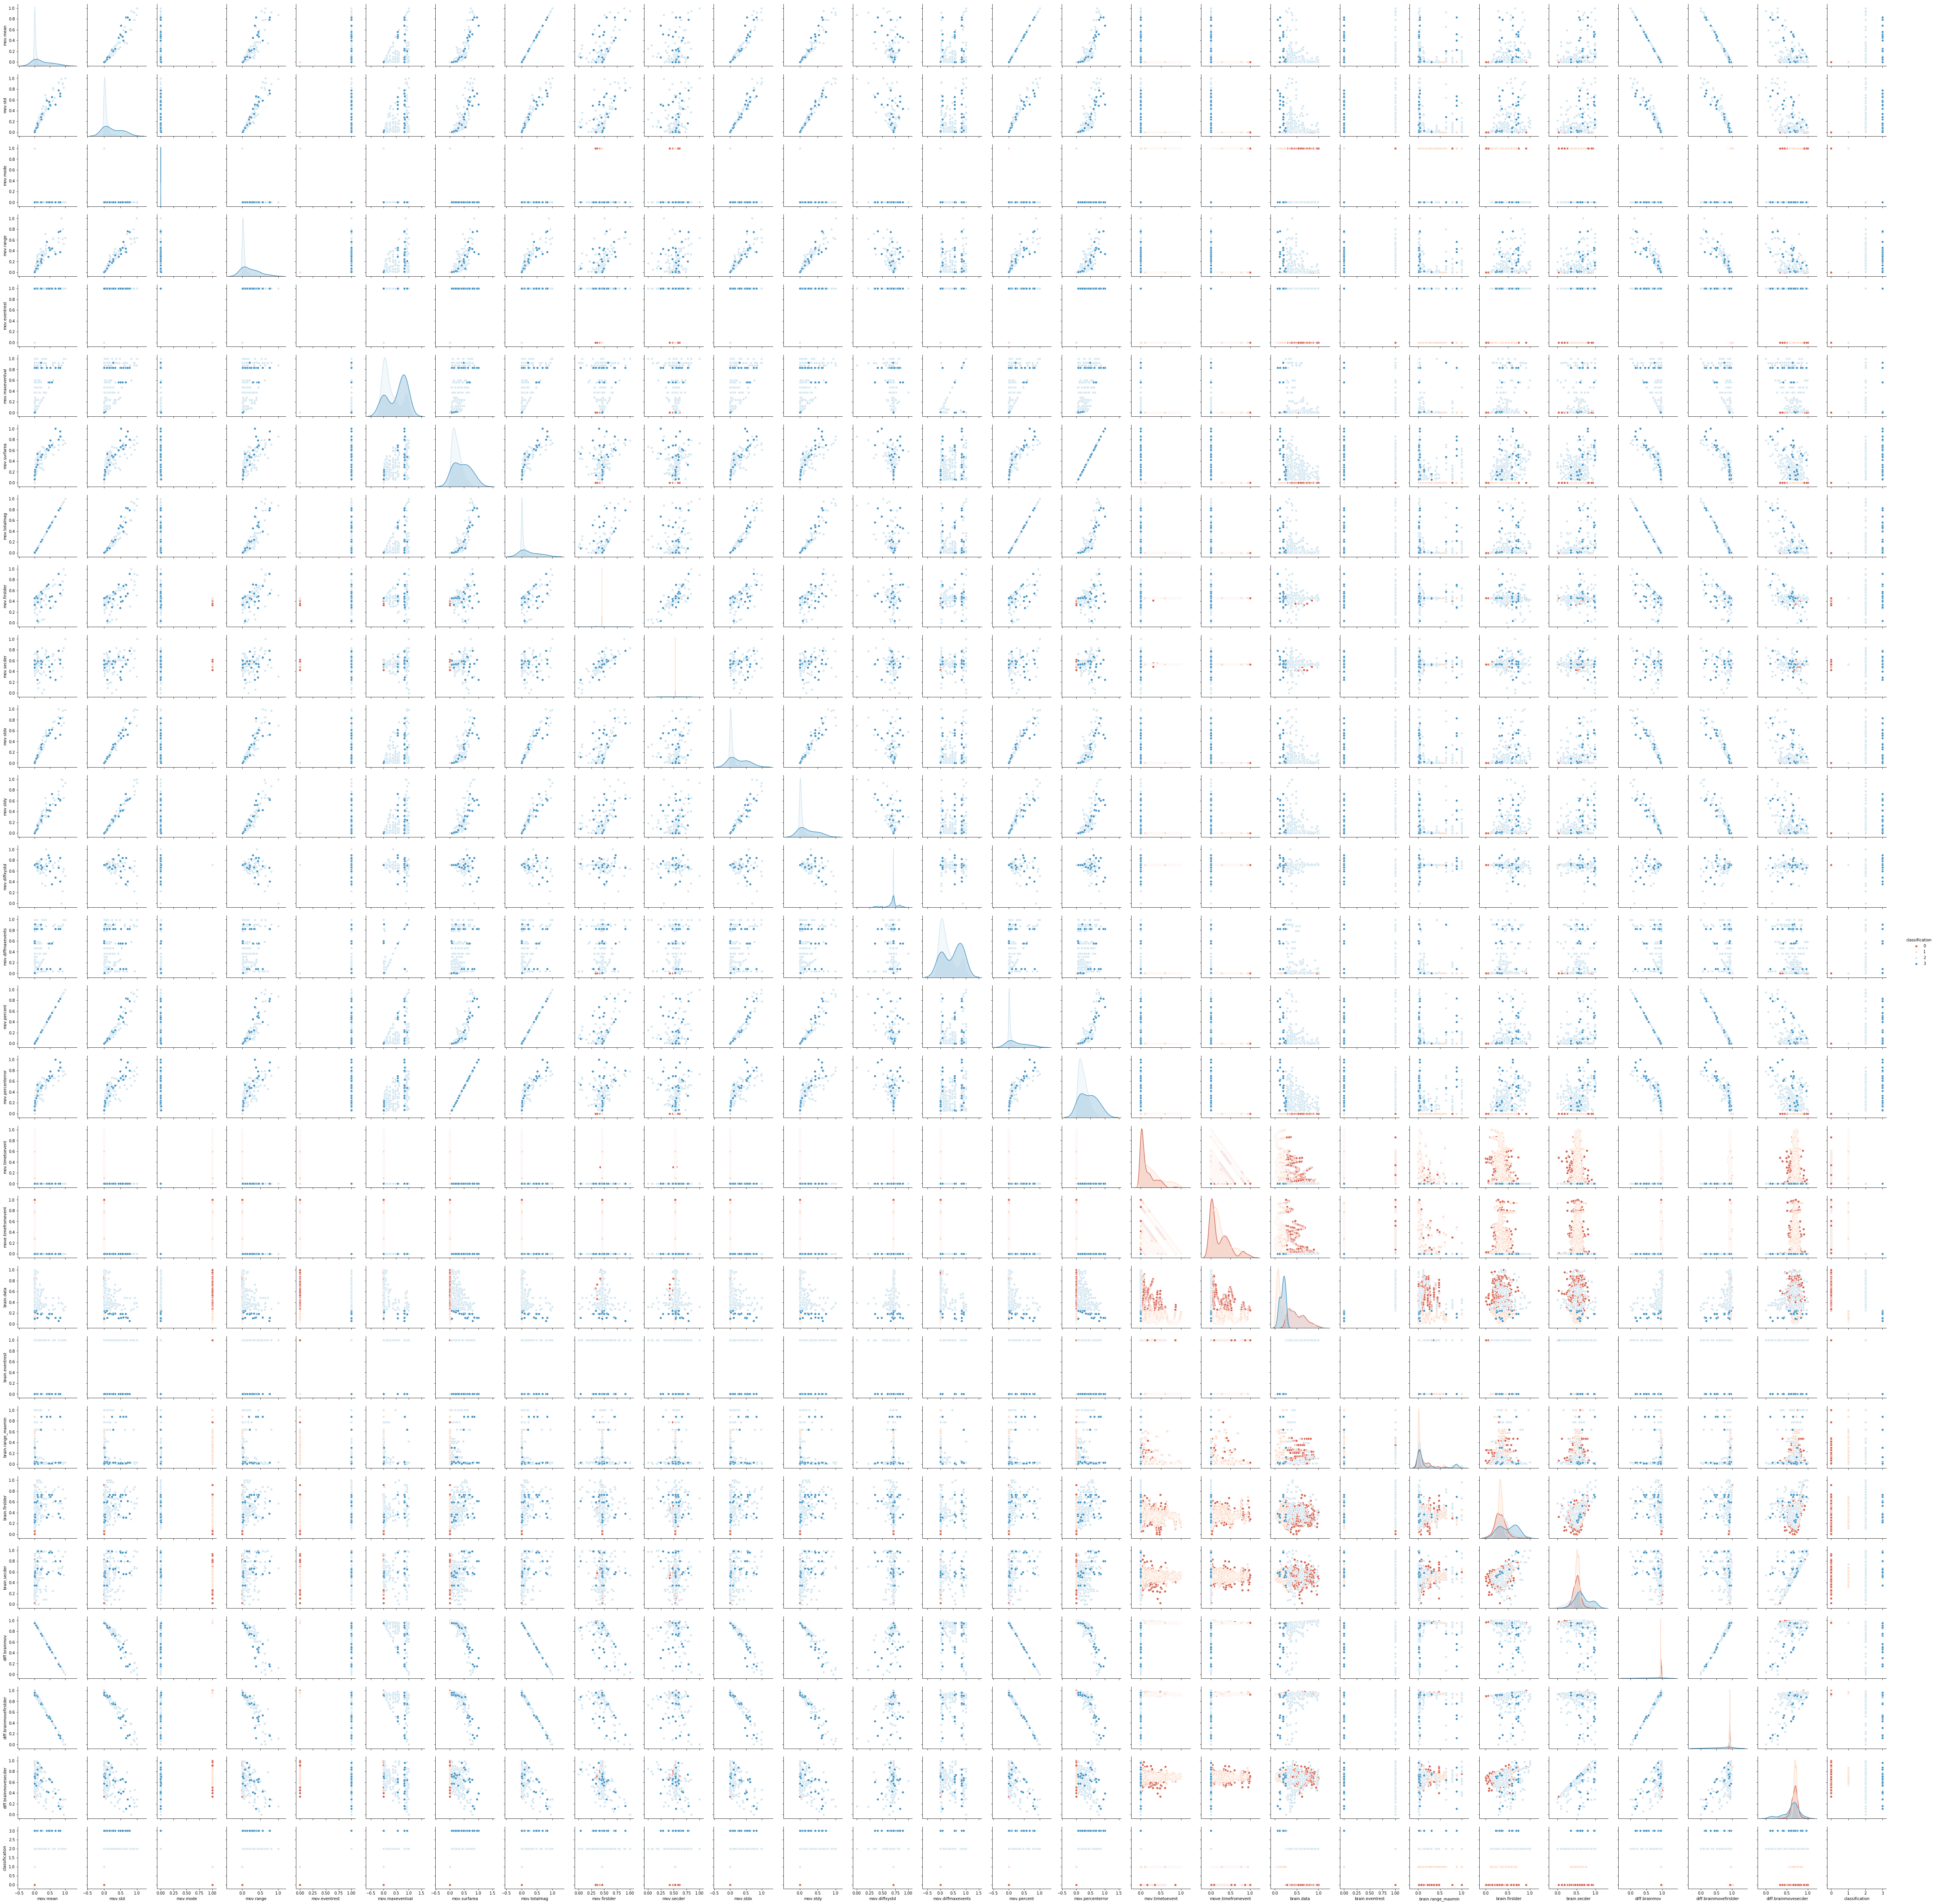

In [26]:
sns.pairplot(data, 
            diag_kind="kde",
            markers= ["o", "o", "o", "o"], 
            hue_order = [0, 1, 2, 3], hue='classification', palette = "RdBu")
plt.savefig('/Users/shreyamantripragada/Documents/metrics_pairplot.png')

In [27]:
sns.pairplot(data.fillna(value=0)[['mov.timetoevent', 'mov.timefromevent', 'brian.data', 'brain.eventrest', 'brain.rangemaxmin']])                                 
                    

KeyError: "['brian.data', 'mov.timefromevent', 'brain.rangemaxmin'] not in index"

In [19]:
%matplotlib inline

col_list = list(data)

#puts the paramter on a scale of 0 to 1

#datacopy = data.drop('age', axis =1).copy()
data -= data.min()
data /= data.max()
data = data.fillna(value=0)

/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


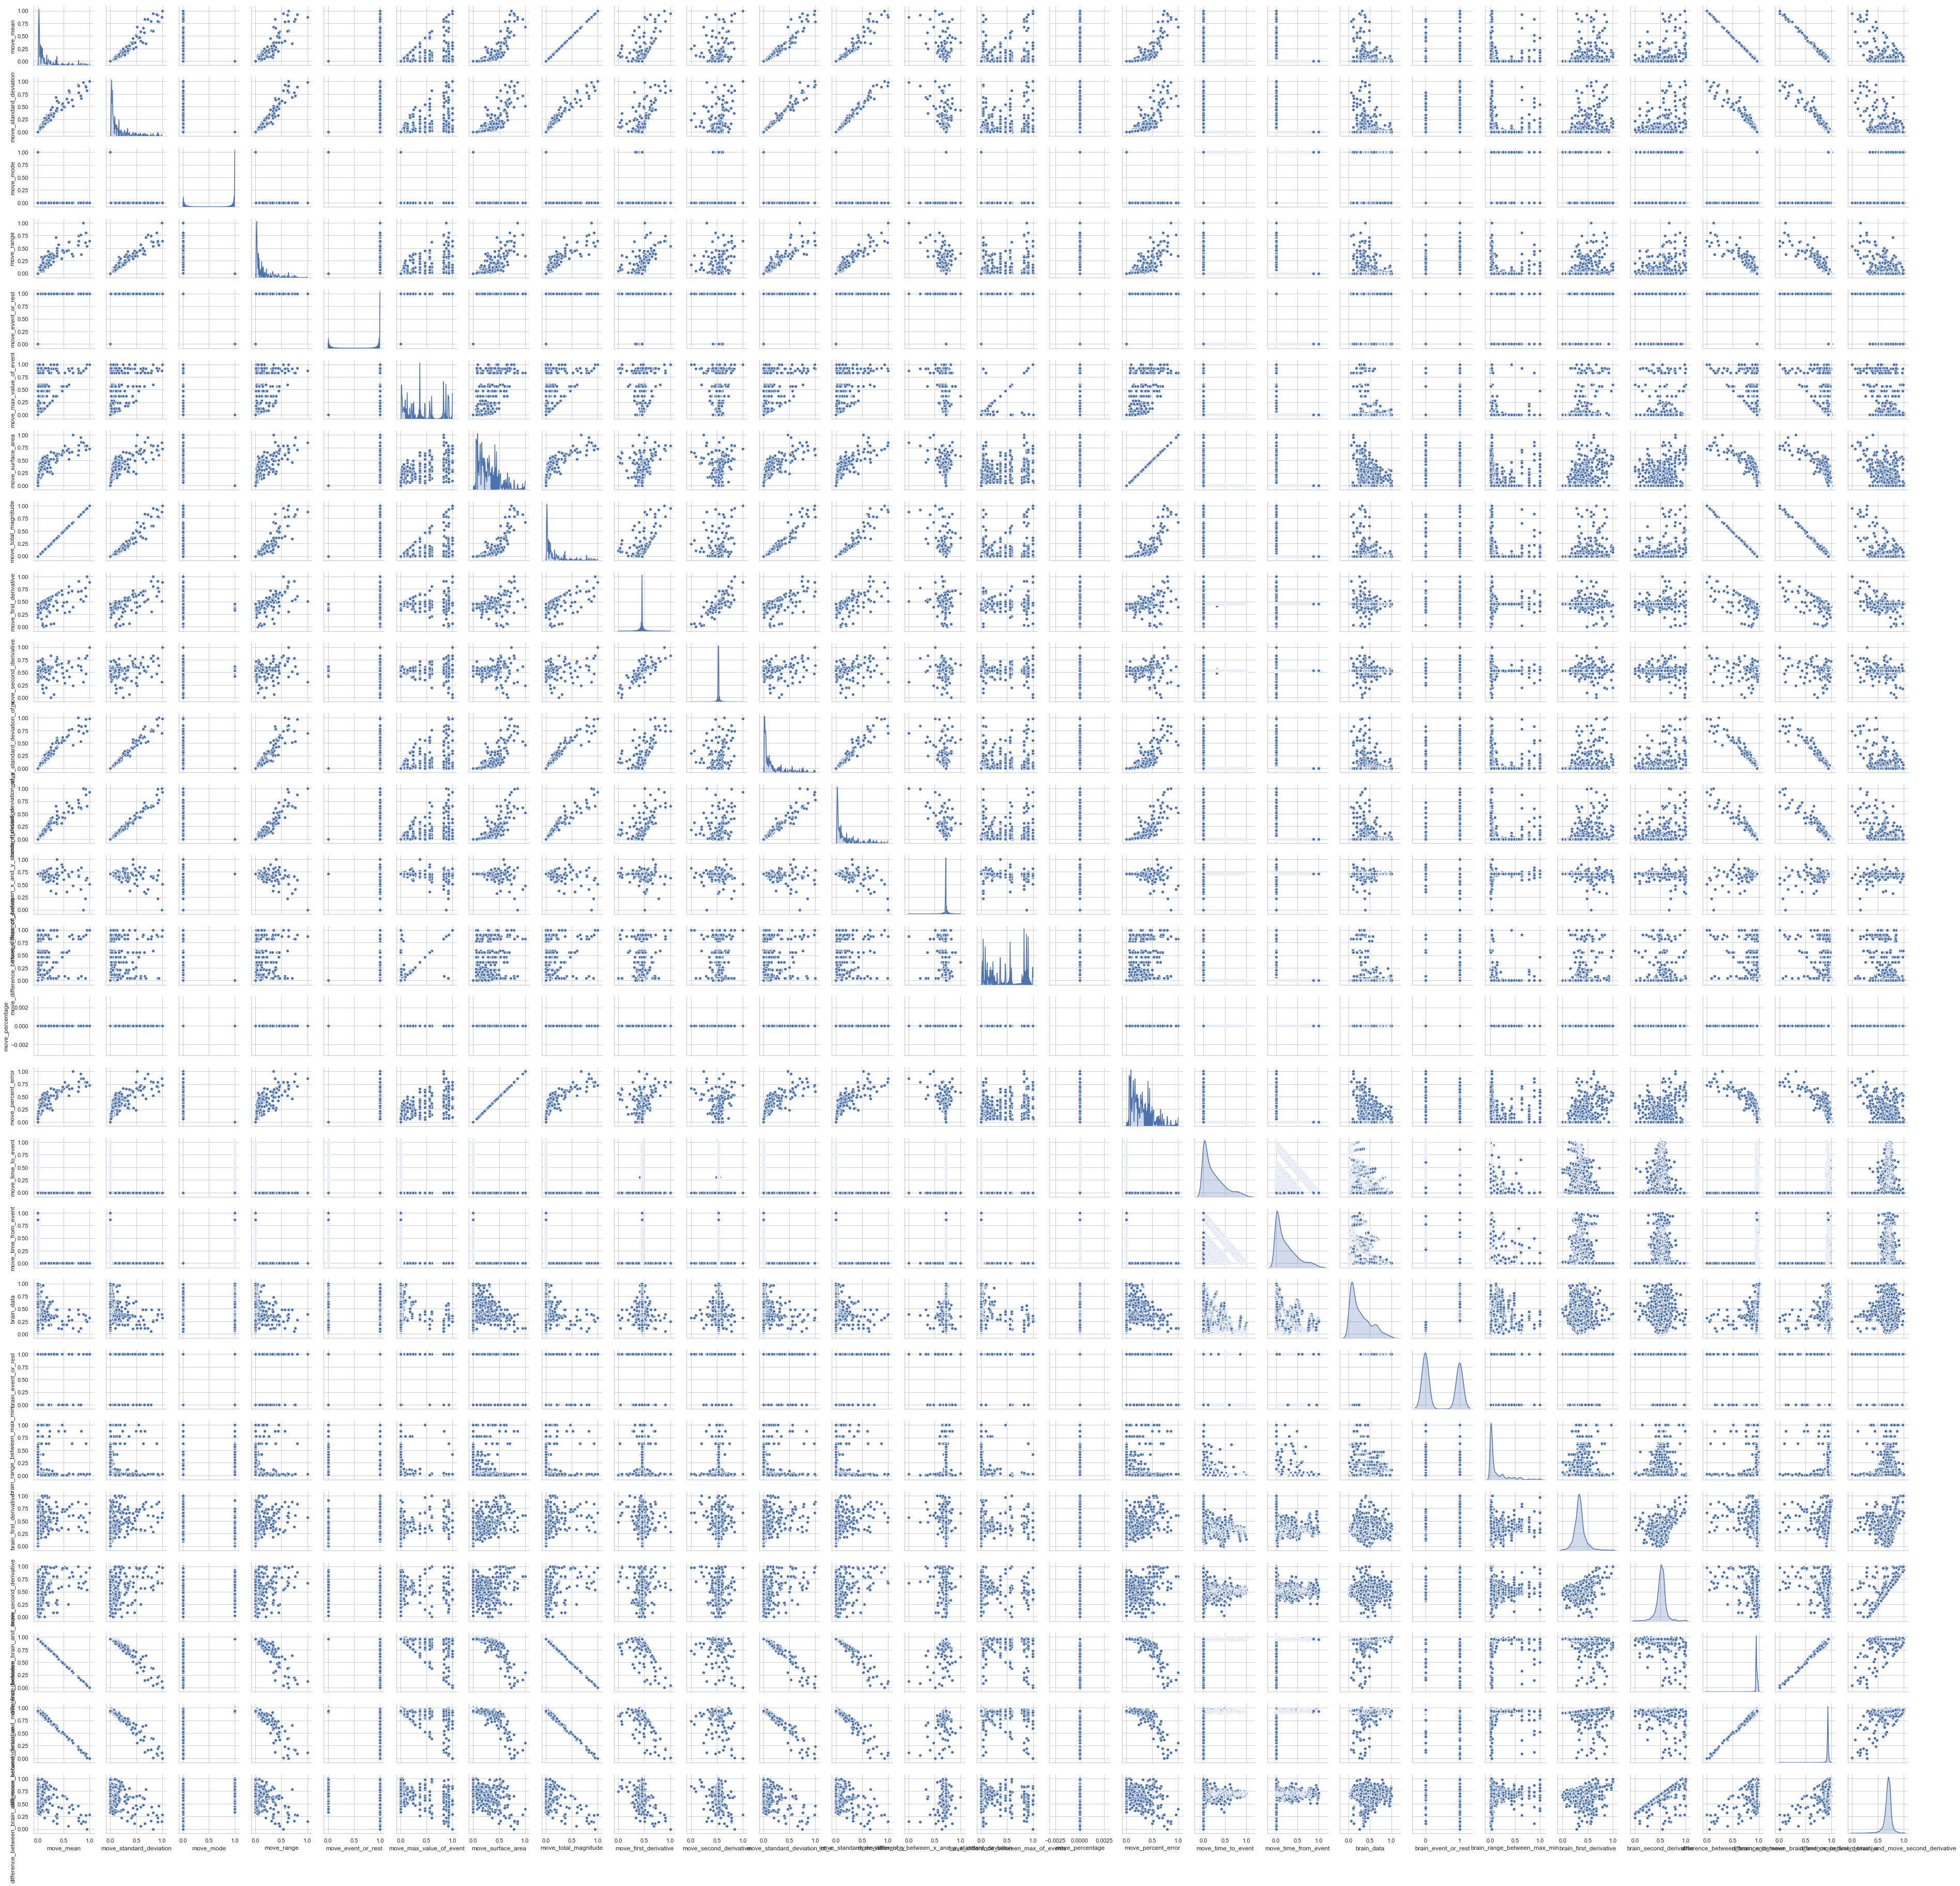

In [30]:
# Both temporal and spatial metrics visualize  
sns.pairplot(data, 
             diag_kind="kde")

plt.savefig('/Users/shreyamantripragada/Documents/metrics_pairplot.png')
plt.show()

In [21]:
print(sns.__version__)

0.9.0


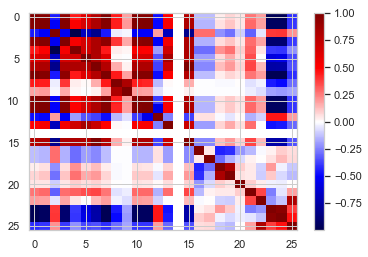

In [40]:
plt.imshow(data.corr().values, aspect = "auto", cmap = "seismic")
plt.colorbar()